
## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

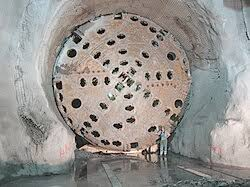

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/ml/rock_density_xray.csv'


df = pd.read_csv(file_path)

df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [ ]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

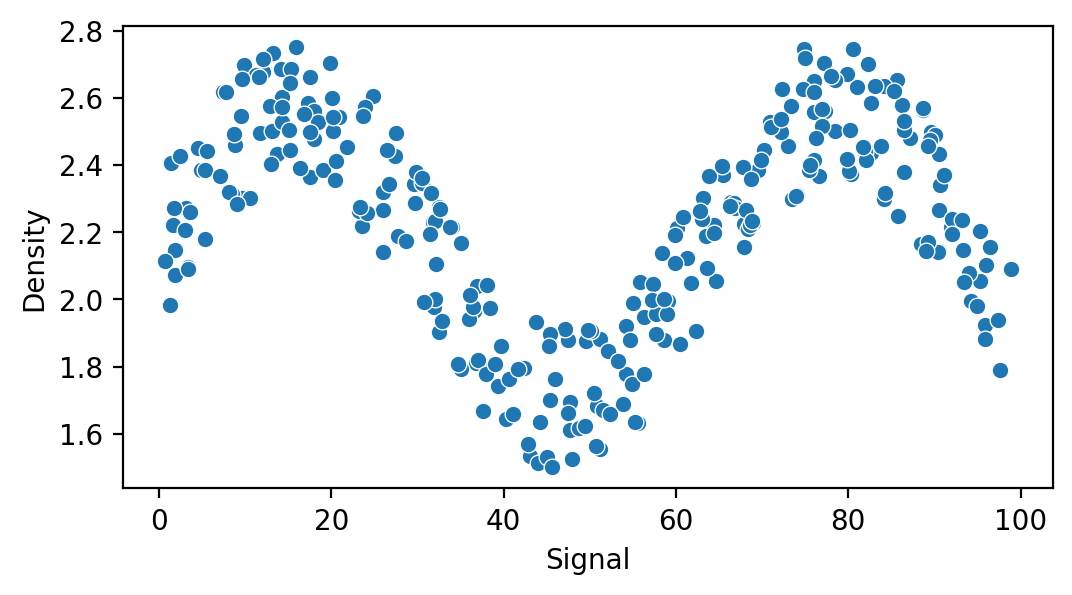

In [ ]:
plt.figure(figsize=(6,3),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [ ]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

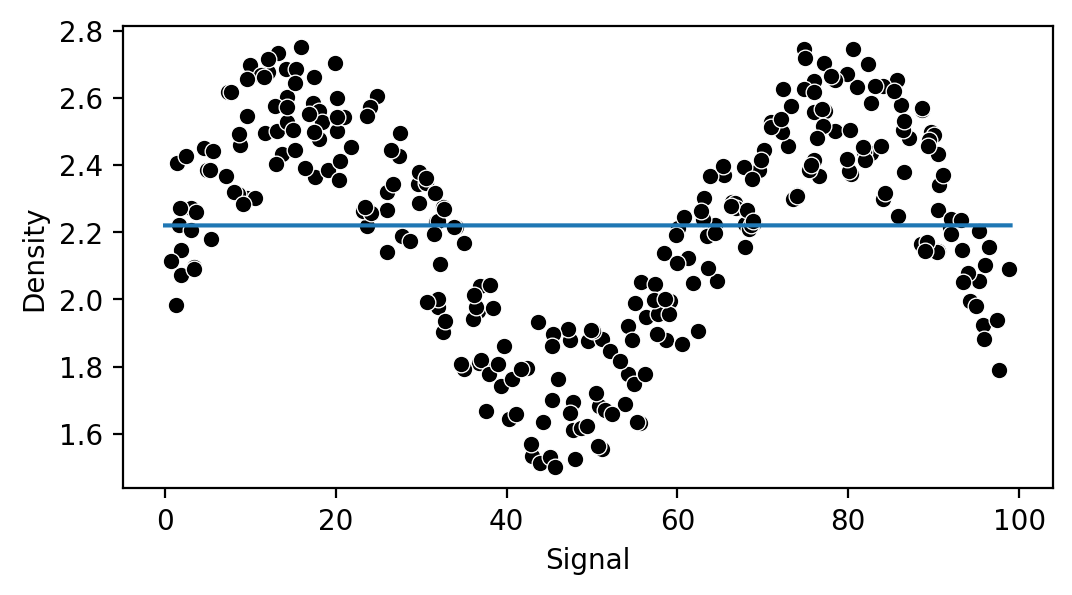

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_preds = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr_preds))

# What does the fit look like?
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))

plt.figure(figsize=(6,3),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

## Function to Help Run Models


In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))


    plt.figure(figsize=(6,3),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


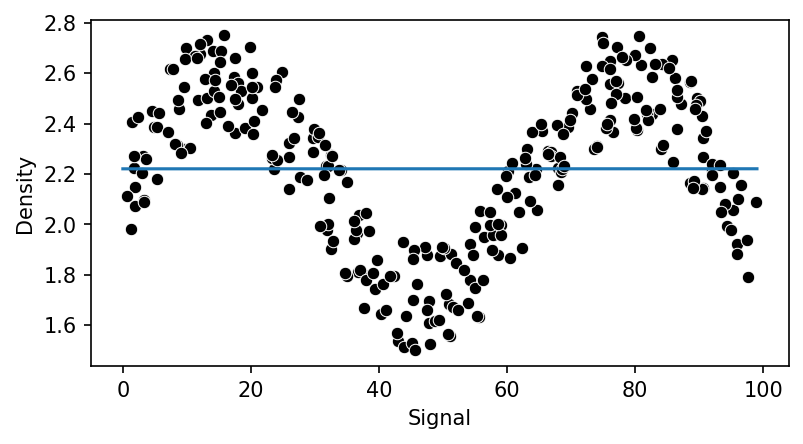

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


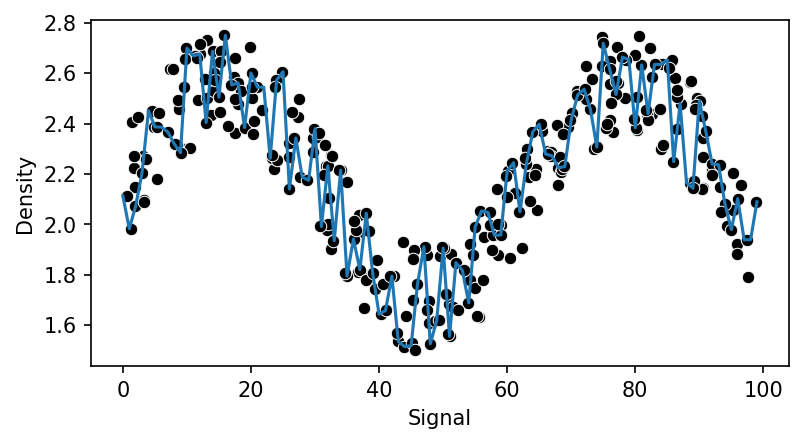

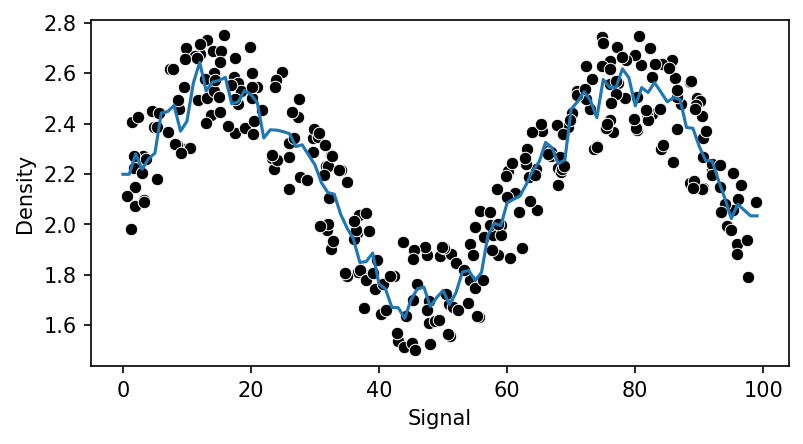

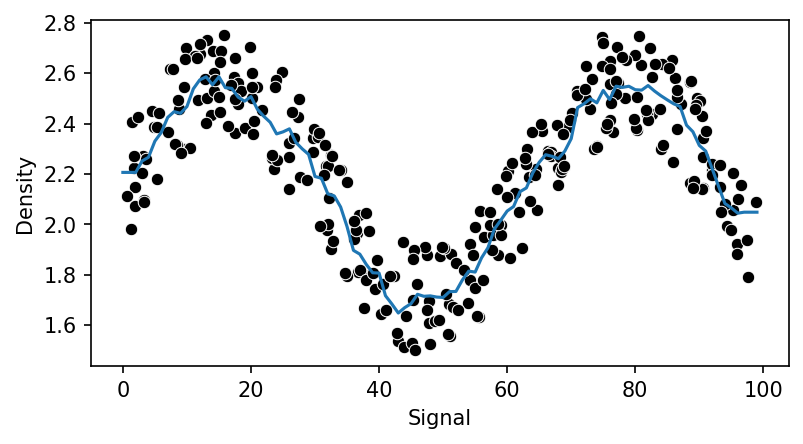

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

preds = {}
k_values = [1,5,10]
for n in k_values:


    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337


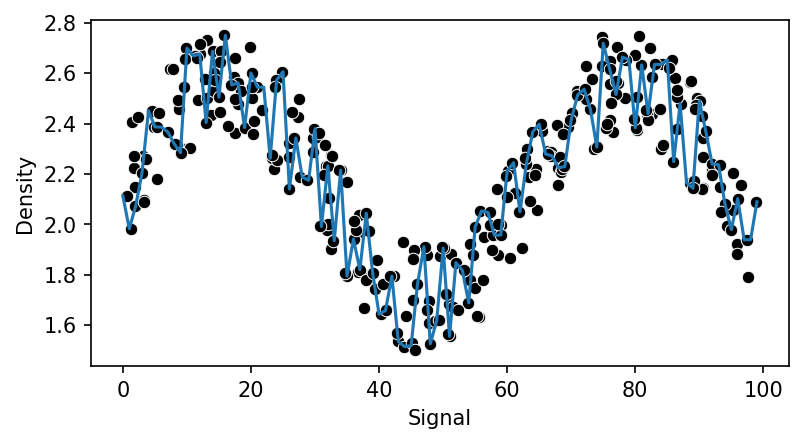

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.12646999302047557


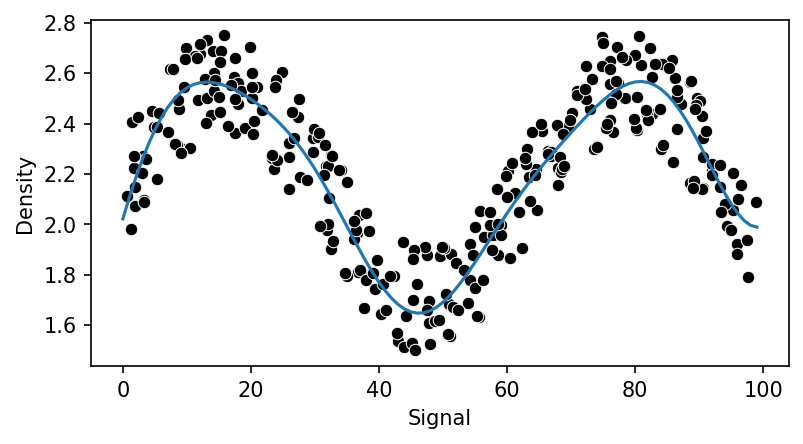

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr,param_grid)

run_model(grid,X_train,y_train,X_test,y_test)

RMSE : 0.13110912056959084
RMSE : 0.1326631388082512
RMSE : 0.13448646181704543


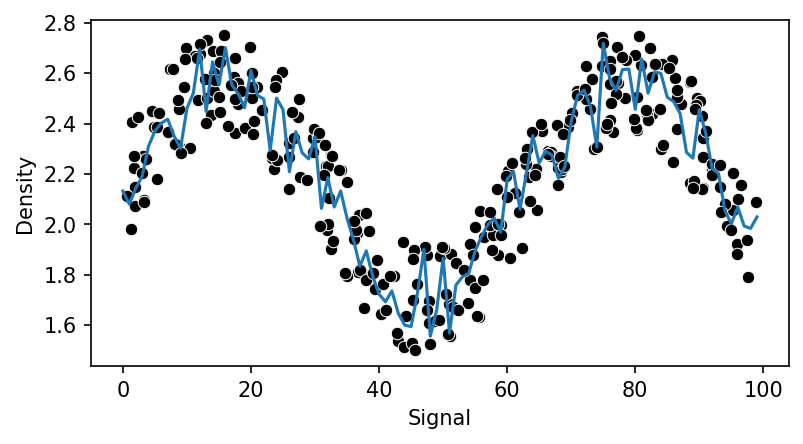

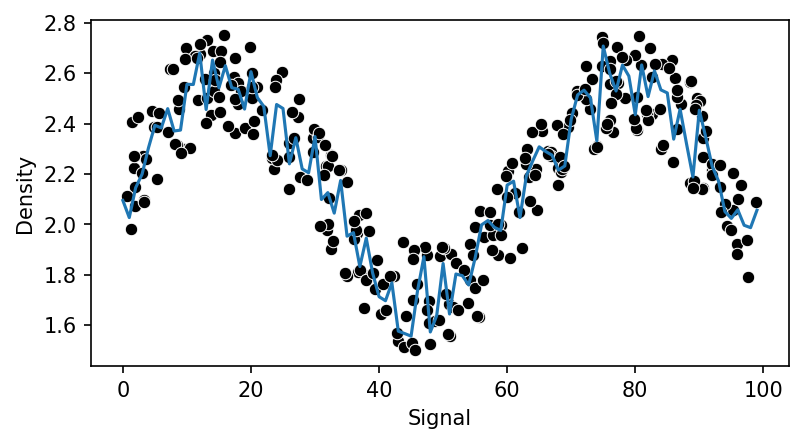

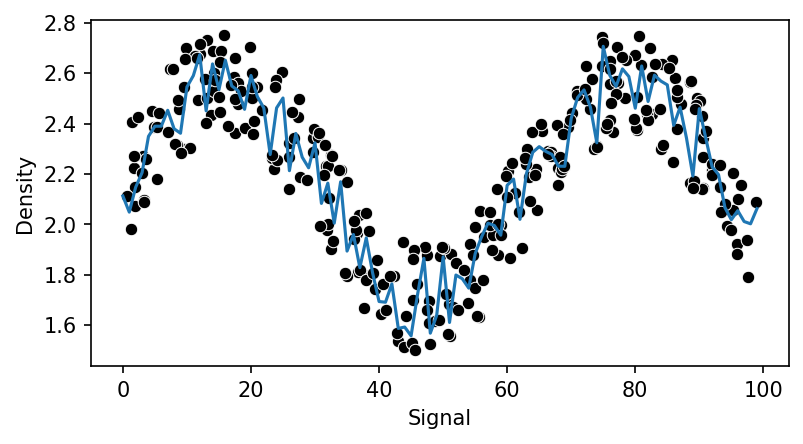

In [ ]:
from sklearn.ensemble import RandomForestRegressor

trees = [10,50,100]
for n in trees:

    model = RandomForestRegressor(n_estimators=n)

    run_model(model,X_train,y_train,X_test,y_test)